In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir('/content/drive/My Drive/Mini_hackathon')

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
train

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,5/22/2023,57mm,freezers available,outstation,outlet_code_3254,95
1,5/29/2023,8mm,freezers available,outstation,outlet_code_1859,107
2,5/8/2023,170.57mm,freezers available,outstation,outlet_code_4176,83
3,5/22/2023,37mm,freezers available,outstation,outlet_code_1459,106
4,3/27/2023,7mm,freezers available,outstation,outlet_code_38,43
...,...,...,...,...,...,...
113395,4/24/2023,61mm,freezers available,western,outlet_code_2946,27
113396,2/20/2023,10mm,freezers available,western,outlet_code_3671,36
113397,6/5/2023,98.28mm,freezers available,western,outlet_code_3671,76
113398,6/5/2023,120.46mm,freezers available,western,outlet_code_2618,76


In [7]:
test = pd.read_csv('test.csv')
test

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,7/10/2023,144.6mm,freezers available,outstation,outlet_code_1,NaN
1,7/10/2023,114.6mm,freezers available,western,outlet_code_10,NaN
2,7/10/2023,135.48mm,freezers available,western,outlet_code_100,NaN
3,7/10/2023,135.53mm,no freezers available,outstation,outlet_code_1000,NaN
4,7/10/2023,167.37mm,no freezers available,outstation,outlet_code_1001,NaN
...,...,...,...,...,...,...
4195,7/10/2023,82.37mm,freezers available,western,outlet_code_995,NaN
4196,7/10/2023,111.45mm,freezers available,western,outlet_code_996,NaN
4197,7/10/2023,159.72mm,freezers available,outstation,outlet_code_997,NaN
4198,7/10/2023,155.37mm,freezers available,outstation,outlet_code_998,NaN


In [8]:
train.describe()

,sales_quantity
count,113400.000000
mean,33.644586
std,27.834651
min,3.000000
25%,14.000000
50%,26.000000
75%,44.000000
max,227.000000


In [9]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = train.copy()  # Create a copy of the original DataFrame to avoid modifying it

df['outlet_code'] = df['outlet_code'].str.extract(r'(\d+)')
df['outlet_code'] = pd.to_numeric(df['outlet_code'])

In [10]:
df

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,5/22/2023,57mm,freezers available,outstation,3254,95
1,5/29/2023,8mm,freezers available,outstation,1859,107
2,5/8/2023,170.57mm,freezers available,outstation,4176,83
3,5/22/2023,37mm,freezers available,outstation,1459,106
4,3/27/2023,7mm,freezers available,outstation,38,43
...,...,...,...,...,...,...
113395,4/24/2023,61mm,freezers available,western,2946,27
113396,2/20/2023,10mm,freezers available,western,3671,36
113397,6/5/2023,98.28mm,freezers available,western,3671,76
113398,6/5/2023,120.46mm,freezers available,western,2618,76


In [11]:
outlet_code_counts = df['outlet_code'].value_counts()

# Display the counts for each unique value
print(outlet_code_counts)

3254    27
1374    27
457     27
1709    27
1431    27
        ..
4099    27
3445    27
3879    27
1957    27
3606    27
Name: outlet_code, Length: 4200, dtype: int64


In [12]:
df['expected_rainfall'] = pd.to_numeric(df['expected_rainfall'].str.rstrip('mm'), errors='coerce')

In [13]:
df

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,5/22/2023,57.00,freezers available,outstation,3254,95
1,5/29/2023,8.00,freezers available,outstation,1859,107
2,5/8/2023,170.57,freezers available,outstation,4176,83
3,5/22/2023,37.00,freezers available,outstation,1459,106
4,3/27/2023,7.00,freezers available,outstation,38,43
...,...,...,...,...,...,...
113395,4/24/2023,61.00,freezers available,western,2946,27
113396,2/20/2023,10.00,freezers available,western,3671,36
113397,6/5/2023,98.28,freezers available,western,3671,76
113398,6/5/2023,120.46,freezers available,western,2618,76


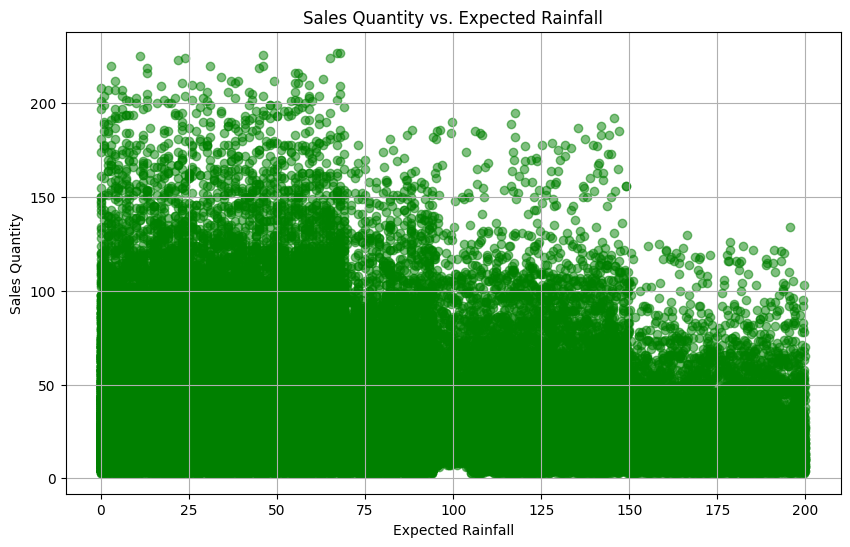

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['expected_rainfall'], df['sales_quantity'], color='green', alpha=0.5)
plt.xlabel('Expected Rainfall')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity vs. Expected Rainfall')
plt.grid(True)
plt.show()

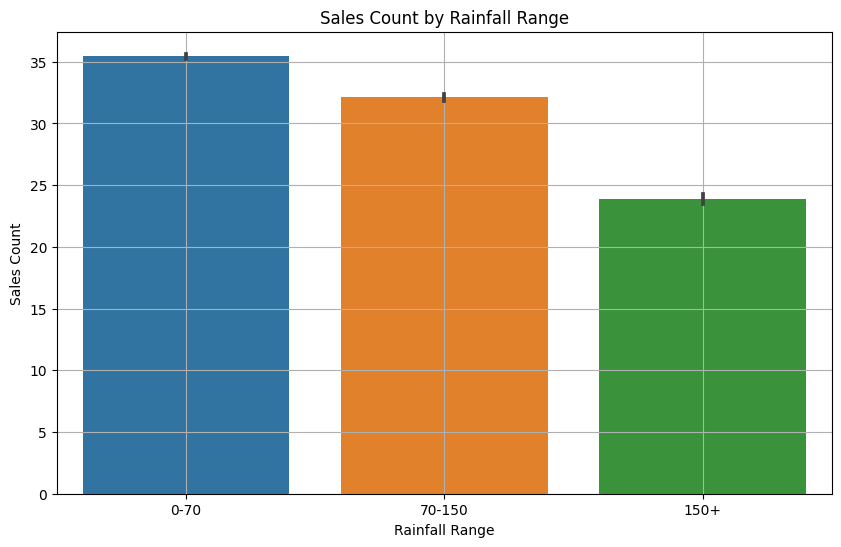

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define rainfall bins
bins = [0, 70, 150, float('inf')]  # Adjust the bin edges as needed
labels = ['0-70', '70-150', '150+']  # Adjust the labels as needed

# Create a new column 'rainfall_range' with the corresponding labels
df['rainfall_range'] = pd.cut(df['expected_rainfall'], bins=bins, labels=labels, right=False)

# Plot a bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='rainfall_range', y='sales_quantity', data=df, order=labels)
plt.title('Sales Count by Rainfall Range')
plt.xlabel('Rainfall Range')
plt.ylabel('Sales Count')
plt.grid(True)
plt.show()

In [16]:
df

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,rainfall_range
0,5/22/2023,57.00,freezers available,outstation,3254,95,0-70
1,5/29/2023,8.00,freezers available,outstation,1859,107,0-70
2,5/8/2023,170.57,freezers available,outstation,4176,83,150+
3,5/22/2023,37.00,freezers available,outstation,1459,106,0-70
4,3/27/2023,7.00,freezers available,outstation,38,43,0-70
...,...,...,...,...,...,...,...
113395,4/24/2023,61.00,freezers available,western,2946,27,0-70
113396,2/20/2023,10.00,freezers available,western,3671,36,0-70
113397,6/5/2023,98.28,freezers available,western,3671,76,70-150
113398,6/5/2023,120.46,freezers available,western,2618,76,70-150


In [17]:
unique_freezer_statuses = df['freezer_status'].unique()

# Print the unique values
print("Unique Freezer Statuses:", unique_freezer_statuses)

# Print the count of unique values
print("Number of Unique Freezer Statuses:", len(unique_freezer_statuses))

Unique Freezer Statuses: ['  freezers available ' ' no freezers available ' ' freezers available '
 '   freezers available ']
Number of Unique Freezer Statuses: 4


In [18]:
# Remove leading and trailing spaces from the 'freezer_status' column
df['freezer_status'] = df['freezer_status'].str.strip()

# Count occurrences of each unique value in the cleaned 'freezer_status' column
freezer_status_counts = df['freezer_status'].value_counts()

# Print the counts
print("Freezer Status Counts:")
print(freezer_status_counts)

# Get unique values after removing spaces
unique_freezer_statuses = df['freezer_status'].unique()

# Print the unique values
print("Unique Freezer Statuses:", unique_freezer_statuses)

Freezer Status Counts:
freezers available       85995
no freezers available    27405
Name: freezer_status, dtype: int64
Unique Freezer Statuses: ['freezers available' 'no freezers available']


In [19]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'freezer_status' column
label_encoder = LabelEncoder()
df['freezer_status_encoded'] = label_encoder.fit_transform(df['freezer_status'])

# Create binary columns for each unique value in the 'freezer_status' column
df_encoded = pd.get_dummies(df, columns=['freezer_status_encoded'], prefix='freezer_status')

# Print the cleaned and encoded DataFrame
print("Cleaned and Encoded DataFrame:")
df_encoded

Cleaned and Encoded DataFrame:


,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,rainfall_range,freezer_status_0,freezer_status_1
0,5/22/2023,57.00,freezers available,outstation,3254,95,0-70,1,0
1,5/29/2023,8.00,freezers available,outstation,1859,107,0-70,1,0
2,5/8/2023,170.57,freezers available,outstation,4176,83,150+,1,0
3,5/22/2023,37.00,freezers available,outstation,1459,106,0-70,1,0
4,3/27/2023,7.00,freezers available,outstation,38,43,0-70,1,0
...,...,...,...,...,...,...,...,...,...
113395,4/24/2023,61.00,freezers available,western,2946,27,0-70,1,0
113396,2/20/2023,10.00,freezers available,western,3671,36,0-70,1,0
113397,6/5/2023,98.28,freezers available,western,3671,76,70-150,1,0
113398,6/5/2023,120.46,freezers available,western,2618,76,70-150,1,0


In [20]:
df_encoded = pd.get_dummies(df_encoded, columns=['rainfall_range'], prefix='rainfall_range')

# Print or display the DataFrame with the one-hot encoded 'rainfall_range' column
print("DataFrame with One-Hot Encoded 'rainfall_range' column:")
df_encoded

DataFrame with One-Hot Encoded 'rainfall_range' column:


,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+
0,5/22/2023,57.00,freezers available,outstation,3254,95,1,0,1,0,0
1,5/29/2023,8.00,freezers available,outstation,1859,107,1,0,1,0,0
2,5/8/2023,170.57,freezers available,outstation,4176,83,1,0,0,0,1
3,5/22/2023,37.00,freezers available,outstation,1459,106,1,0,1,0,0
4,3/27/2023,7.00,freezers available,outstation,38,43,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
113395,4/24/2023,61.00,freezers available,western,2946,27,1,0,1,0,0
113396,2/20/2023,10.00,freezers available,western,3671,36,1,0,1,0,0
113397,6/5/2023,98.28,freezers available,western,3671,76,1,0,0,1,0
113398,6/5/2023,120.46,freezers available,western,2618,76,1,0,0,1,0


In [21]:
unique_outlet_regions = df_encoded['outlet_region'].unique()

# Print the unique values
print("Unique Outlet Regions:", unique_outlet_regions)

Unique Outlet Regions: ['outstation' 'upcountry' 'western']


In [22]:
import pandas as pd

df_encoded = pd.get_dummies(df_encoded, columns=['outlet_region'], prefix='outlet_region')

# Print or display the DataFrame with the one-hot encoded 'outlet_region' column
print("DataFrame with One-Hot Encoded 'outlet_region' column:")
df_encoded

DataFrame with One-Hot Encoded 'outlet_region' column:


,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,5/22/2023,57.00,freezers available,3254,95,1,0,1,0,0,1,0,0
1,5/29/2023,8.00,freezers available,1859,107,1,0,1,0,0,1,0,0
2,5/8/2023,170.57,freezers available,4176,83,1,0,0,0,1,1,0,0
3,5/22/2023,37.00,freezers available,1459,106,1,0,1,0,0,1,0,0
4,3/27/2023,7.00,freezers available,38,43,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113395,4/24/2023,61.00,freezers available,2946,27,1,0,1,0,0,0,0,1
113396,2/20/2023,10.00,freezers available,3671,36,1,0,1,0,0,0,0,1
113397,6/5/2023,98.28,freezers available,3671,76,1,0,0,1,0,0,0,1
113398,6/5/2023,120.46,freezers available,2618,76,1,0,0,1,0,0,0,1


In [23]:

df_encoded['week_start_date'] = pd.to_datetime(df_encoded['week_start_date'], format='%m/%d/%Y')

# Function to calculate the custom week number
def custom_week_number(date):
    first_day_of_month = date.replace(day=1)
    days_in_first_week = 7 - first_day_of_month.weekday()
    return min((date.day + days_in_first_week - 1) // 7 + 1, 5)  # Ensure that the custom week is at most 5

# Extract year, month, and custom week
df_encoded['year'] = df_encoded['week_start_date'].dt.year
df_encoded['month'] = df_encoded['week_start_date'].dt.month
df_encoded['custom_week'] = df_encoded['week_start_date'].apply(custom_week_number)

# Print or display the DataFrame with the new columns
print("DataFrame with Extracted Year, Month, and Custom Week:")
df_encoded

DataFrame with Extracted Year, Month, and Custom Week:


,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,year,month,custom_week
0,2023-05-22,57.00,freezers available,3254,95,1,0,1,0,0,1,0,0,2023,5,5
1,2023-05-29,8.00,freezers available,1859,107,1,0,1,0,0,1,0,0,2023,5,5
2,2023-05-08,170.57,freezers available,4176,83,1,0,0,0,1,1,0,0,2023,5,3
3,2023-05-22,37.00,freezers available,1459,106,1,0,1,0,0,1,0,0,2023,5,5
4,2023-03-27,7.00,freezers available,38,43,1,0,1,0,0,1,0,0,2023,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113395,2023-04-24,61.00,freezers available,2946,27,1,0,1,0,0,0,0,1,2023,4,4
113396,2023-02-20,10.00,freezers available,3671,36,1,0,1,0,0,0,0,1,2023,2,4
113397,2023-06-05,98.28,freezers available,3671,76,1,0,0,1,0,0,0,1,2023,6,2
113398,2023-06-05,120.46,freezers available,2618,76,1,0,0,1,0,0,0,1,2023,6,2


In [24]:
# Get unique values for the 'year' column
unique_years = df_encoded['year'].unique()
print("Unique Years:", unique_years)

# Get unique values for the 'month' column
unique_months = df_encoded['month'].unique()
print("Unique Months:", unique_months)

# Get unique values for the 'custom_week' column
unique_custom_weeks = df_encoded['custom_week'].unique()
print("Unique Custom Weeks:", unique_custom_weeks)

Unique Years: [2023]
Unique Months: [5 3 4 1 2 6 7]
Unique Custom Weeks: [5 3 2 4 1]


In [25]:
# Drop the 'year' column from the DataFrame
df_encoded = df_encoded.drop(columns=['year'])
df_encoded

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,month,custom_week
0,2023-05-22,57.00,freezers available,3254,95,1,0,1,0,0,1,0,0,5,5
1,2023-05-29,8.00,freezers available,1859,107,1,0,1,0,0,1,0,0,5,5
2,2023-05-08,170.57,freezers available,4176,83,1,0,0,0,1,1,0,0,5,3
3,2023-05-22,37.00,freezers available,1459,106,1,0,1,0,0,1,0,0,5,5
4,2023-03-27,7.00,freezers available,38,43,1,0,1,0,0,1,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113395,2023-04-24,61.00,freezers available,2946,27,1,0,1,0,0,0,0,1,4,4
113396,2023-02-20,10.00,freezers available,3671,36,1,0,1,0,0,0,0,1,2,4
113397,2023-06-05,98.28,freezers available,3671,76,1,0,0,1,0,0,0,1,6,2
113398,2023-06-05,120.46,freezers available,2618,76,1,0,0,1,0,0,0,1,6,2


In [26]:
sales_quantity_column = df_encoded.pop('sales_quantity')  # Remove the column
df_encoded['sales_quantity'] = sales_quantity_column  # Add the column back at the end

# Print or display the updated DataFrame
print("DataFrame with 'sales_quantity' moved to the last column:")
df_encoded

DataFrame with 'sales_quantity' moved to the last column:


,week_start_date,expected_rainfall,freezer_status,outlet_code,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,month,custom_week,sales_quantity
0,2023-05-22,57.00,freezers available,3254,1,0,1,0,0,1,0,0,5,5,95
1,2023-05-29,8.00,freezers available,1859,1,0,1,0,0,1,0,0,5,5,107
2,2023-05-08,170.57,freezers available,4176,1,0,0,0,1,1,0,0,5,3,83
3,2023-05-22,37.00,freezers available,1459,1,0,1,0,0,1,0,0,5,5,106
4,2023-03-27,7.00,freezers available,38,1,0,1,0,0,1,0,0,3,5,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113395,2023-04-24,61.00,freezers available,2946,1,0,1,0,0,0,0,1,4,4,27
113396,2023-02-20,10.00,freezers available,3671,1,0,1,0,0,0,0,1,2,4,36
113397,2023-06-05,98.28,freezers available,3671,1,0,0,1,0,0,0,1,6,2,76
113398,2023-06-05,120.46,freezers available,2618,1,0,0,1,0,0,0,1,6,2,76


In [27]:
df_new = df_encoded.drop(["week_start_date","expected_rainfall","freezer_status"],axis=1)

In [28]:
df_new

,outlet_code,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,month,custom_week,sales_quantity
0,3254,1,0,1,0,0,1,0,0,5,5,95
1,1859,1,0,1,0,0,1,0,0,5,5,107
2,4176,1,0,0,0,1,1,0,0,5,3,83
3,1459,1,0,1,0,0,1,0,0,5,5,106
4,38,1,0,1,0,0,1,0,0,3,5,43
...,...,...,...,...,...,...,...,...,...,...,...,...
113395,2946,1,0,1,0,0,0,0,1,4,4,27
113396,3671,1,0,1,0,0,0,0,1,2,4,36
113397,3671,1,0,0,1,0,0,0,1,6,2,76
113398,2618,1,0,0,1,0,0,0,1,6,2,76


In [34]:
# Replace the column names accordingly

selected_columns = ['month', 'custom_week']

# Generate summary statistics
summary_stats = df_new[selected_columns].describe()

# Display the summary statistics
print("Summary Statistics for Synthetic Feature Columns:")
summary_stats


Summary Statistics for Synthetic Feature Columns:


,month,custom_week
count,113400.000000,113400.000000
mean,3.592593,3.222222
std,1.831002,1.314690
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,3.000000
75%,5.000000,4.000000
max,7.000000,5.000000


Average Weekly Sales Volumes for Each Outlet Region:
outlet_region
outstation    30.669778
upcountry     21.515503
western       43.271235
Name: sales_quantity, dtype: float64


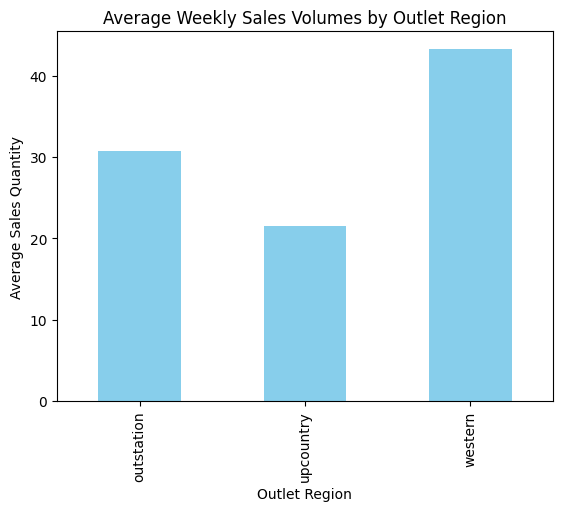

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

average_sales_by_region = df.groupby('outlet_region')['sales_quantity'].mean()

# Display average sales volumes for each outlet region
print("Average Weekly Sales Volumes for Each Outlet Region:")
print(average_sales_by_region)

# Visualize average sales volumes
average_sales_by_region.plot(kind='bar', color='skyblue')
plt.xlabel('Outlet Region')
plt.ylabel('Average Sales Quantity')
plt.title('Average Weekly Sales Volumes by Outlet Region')
plt.show()

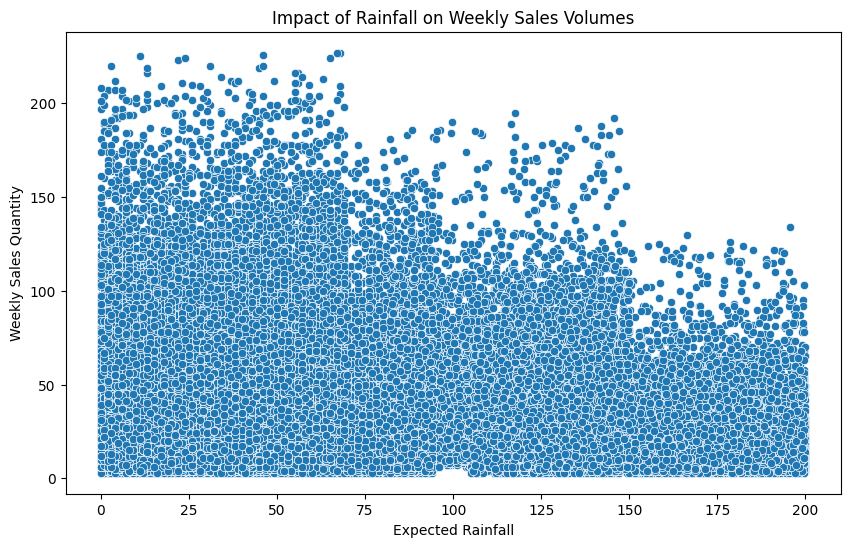

Correlation Coefficient between Rainfall and Sales: -0.0935959187399799


In [36]:
import seaborn as sns

# Scatter plot to assess correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_rainfall', y='sales_quantity', data=df)
plt.xlabel('Expected Rainfall')
plt.ylabel('Weekly Sales Quantity')
plt.title('Impact of Rainfall on Weekly Sales Volumes')
plt.show()

# Calculate correlation coefficient
correlation_coefficient = df['expected_rainfall'].corr(df['sales_quantity'])
print(f"Correlation Coefficient between Rainfall and Sales: {correlation_coefficient}")


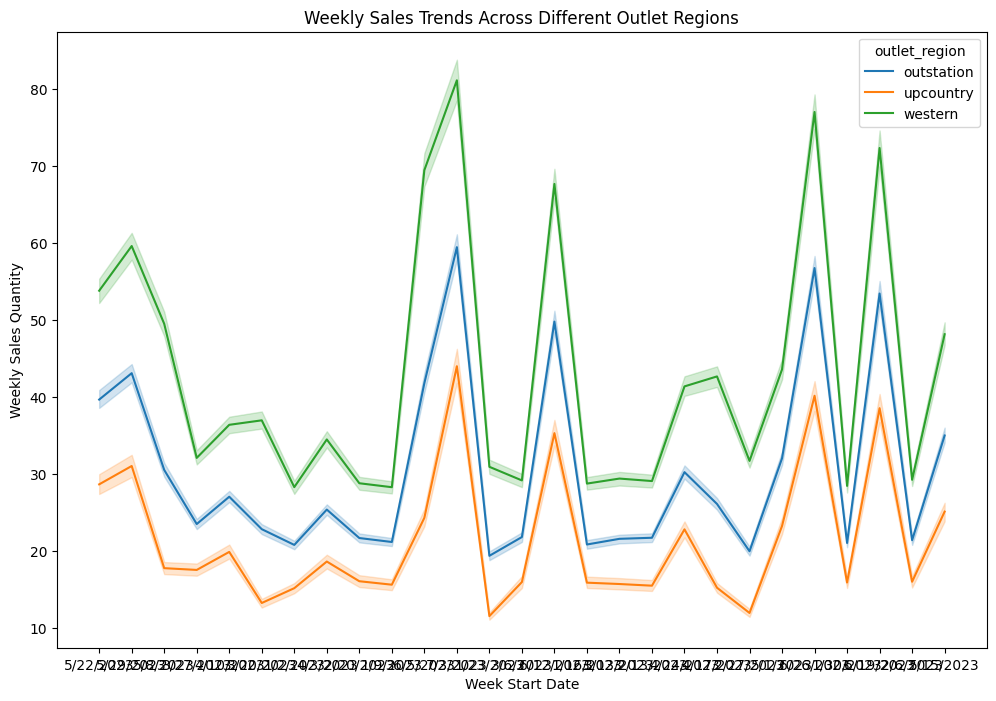

In [37]:
# Line plot for weekly sales trends by outlet region
plt.figure(figsize=(12, 8))
sns.lineplot(x='week_start_date', y='sales_quantity', hue='outlet_region', data=df)
plt.xlabel('Week Start Date')
plt.ylabel('Weekly Sales Quantity')
plt.title('Weekly Sales Trends Across Different Outlet Regions')
plt.show()
